In [4]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes (1).csv


In [5]:
# LOAD THE DATASET

import pandas as pd

# Load the diabetes dataset
data_path = 'diabetes.csv'
diabetes_data = pd.read_csv(data_path)


In [6]:
#DATA SAMPLE
# Show the first few rows of the data to understand its structure
print(diabetes_data.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            2      138             62             35        0  33.6   
1            0       84             82             31      125  38.2   
2            0      145              0              0        0  44.2   
3            0      135             68             42      250  42.3   
4            1      139             62             41      480  40.7   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.127   47        1  
1                     0.233   23        0  
2                     0.630   31        1  
3                     0.365   24        1  
4                     0.536   21        0  


In [7]:
#DATA CLEANING

# Option 1: Impute missing values with the mean or most frequent value (if missing values were present)
# diabetes_data.fillna(diabetes_data.mean(), inplace=True)

# Check for missing values
print("Missing Values in each column:\n", diabetes_data.isnull().sum())

# Handling missing values (if any) - e.g., using mean for numeric data
diabetes_data.fillna(diabetes_data.mean(), inplace=True)

# Check for outliers using simple statistical methods (e.g., Z-score or IQR)
# Here, we'll handle outliers by capping them with a max/min threshold (optional)
import numpy as np

def handle_outliers(df, column):
    upper_limit = df[column].mean() + 3 * df[column].std()
    lower_limit = df[column].mean() - 3 * df[column].std()
    df[column] = np.where(df[column] > upper_limit, upper_limit, df[column])
    df[column] = np.where(df[column] < lower_limit, lower_limit, df[column])
    return df

# Apply outlier handling on all relevant columns
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    diabetes_data = handle_outliers(diabetes_data, col)

# Check again for any abnormalities after cleaning
print(diabetes_data.describe())



Missing Values in each column:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
       Pregnancies      Glucose  BloodPressure  SkinThickness      Insulin  \
count  2000.000000  2000.000000    2000.000000    2000.000000  2000.000000   
mean      3.703500   121.344848      69.666625      20.864489    77.832094   
std       3.306063    31.512868      17.373966      15.809672   101.777790   
min       0.000000    24.976593      11.580556       0.000000     0.000000   
25%       1.000000    99.000000      63.500000       0.000000     0.000000   
50%       3.000000   117.000000      72.000000      23.000000    40.000000   
75%       6.000000   141.000000      80.000000      32.000000   130.000000   
max      17.000000   199.000000     122.000000      69.244729

In [8]:
#Normalization
from sklearn.preprocessing import StandardScaler

# Separate features and labels
X = diabetes_data.drop("Outcome", axis=1)
y = diabetes_data["Outcome"]

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


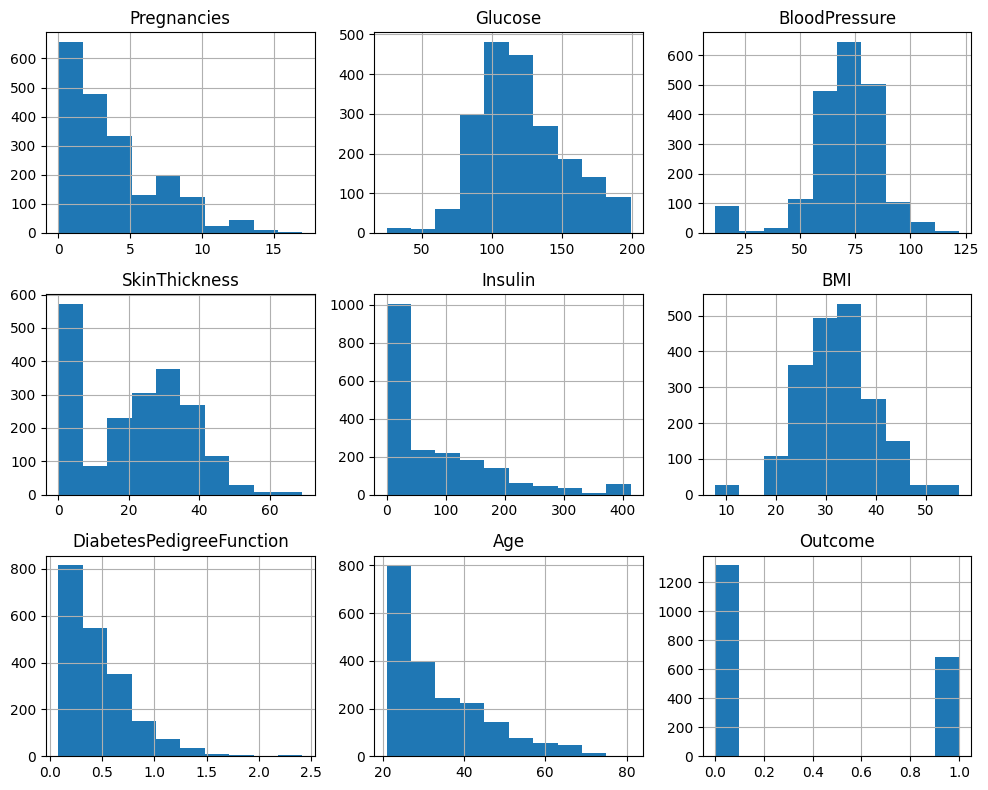

In [9]:
#DATA DISTRIBUTION

import matplotlib.pyplot as plt

# Plot histograms for each feature
diabetes_data.hist(bins=10, figsize=(10, 8))
plt.tight_layout()
plt.show()


In [10]:
# DATA PREPROCESSING

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Separate features and target
X = diabetes_data.drop("Outcome", axis=1)
y = diabetes_data["Outcome"]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Logistic Regression Accuracy: 0.7875
Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.78      0.92      0.85       253
           1       0.80      0.56      0.66       147

    accuracy                           0.79       400
   macro avg       0.79      0.74      0.75       400
weighted avg       0.79      0.79      0.78       400

Confusion Matrix:
 [[232  21]
 [ 64  83]]


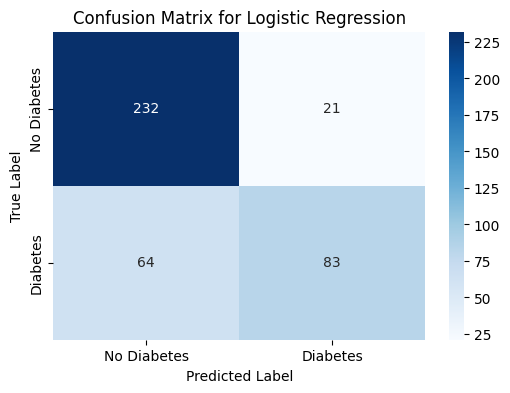

In [11]:
# LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train Logistic Regression model
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, y_train)

# Make predictions
y_pred_log = log_model.predict(X_test)

# Evaluate
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_log))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_log)
print("Confusion Matrix:\n", cm)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()


Perceptron Accuracy: 0.7175
Perceptron Report:
              precision    recall  f1-score   support

           0       0.76      0.81      0.78       253
           1       0.63      0.56      0.59       147

    accuracy                           0.72       400
   macro avg       0.69      0.69      0.69       400
weighted avg       0.71      0.72      0.71       400

Confusion Matrix:
 [[204  49]
 [ 64  83]]


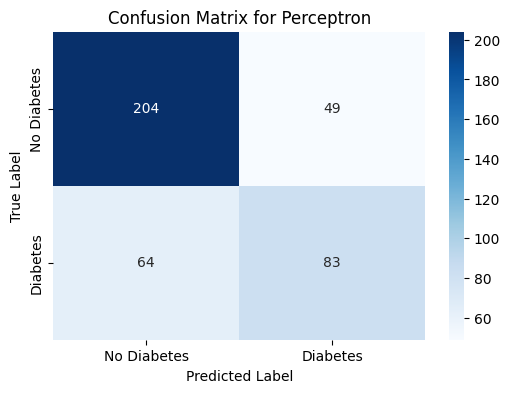

In [12]:
# PERCEPTRON
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train Perceptron model
perceptron_model = Perceptron(random_state=42)
perceptron_model.fit(X_train, y_train)

# Make predictions
y_pred_perceptron = perceptron_model.predict(X_test)

# Evaluate
print("Perceptron Accuracy:", accuracy_score(y_test, y_pred_perceptron))
print("Perceptron Report:")
print(classification_report(y_test, y_pred_perceptron))

# Confusion Matrix
cm_perceptron = confusion_matrix(y_test, y_pred_perceptron)
print("Confusion Matrix:\n", cm_perceptron)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_perceptron, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Perceptron")
plt.show()


Decision Tree Accuracy: 0.98
Decision Tree Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       253
           1       0.95      1.00      0.97       147

    accuracy                           0.98       400
   macro avg       0.97      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400

Confusion Matrix:
 [[245   8]
 [  0 147]]


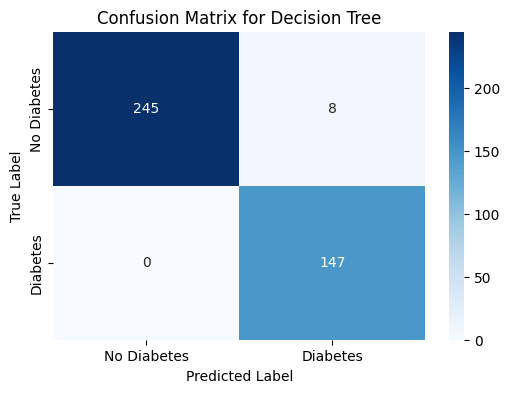

In [13]:
# DECISION TREE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Make predictions
y_pred_tree = decision_tree_model.predict(X_test)

# Evaluate
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Decision Tree Report:")
print(classification_report(y_test, y_pred_tree))

# Confusion Matrix
cm_tree = confusion_matrix(y_test, y_pred_tree)
print("Confusion Matrix:\n", cm_tree)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_tree, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Decision Tree")
plt.show()



KNN Accuracy: 0.8225
KNN Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       253
           1       0.78      0.73      0.75       147

    accuracy                           0.82       400
   macro avg       0.81      0.80      0.81       400
weighted avg       0.82      0.82      0.82       400

Confusion Matrix:
 [[222  31]
 [ 40 107]]


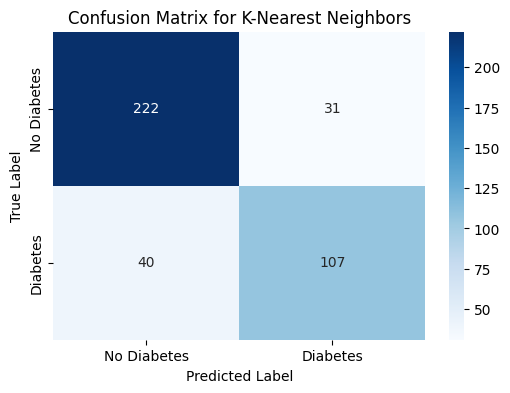

In [14]:
# K NEAREST NEIGHBORS
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train KNN model (using k=5)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluate
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Report:")
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:\n", cm_knn)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for K-Nearest Neighbors")
plt.show()


In [15]:
#K fold Cross Validation
from sklearn.model_selection import cross_val_score

# K-Fold Cross-Validation for Logistic Regression
log_cv_scores = cross_val_score(log_model, X_scaled, y, cv=5)
print("Logistic Regression CV Accuracy:", log_cv_scores.mean())

# K-Fold Cross-Validation for Perceptron
perceptron_cv_scores = cross_val_score(perceptron_model, X_scaled, y, cv=5)
print("Perceptron CV Accuracy:", perceptron_cv_scores.mean())

# K-Fold Cross-Validation for Decision Tree
tree_cv_scores = cross_val_score(decision_tree_model, X_scaled, y, cv=5)
print("Decision Tree CV Accuracy:", tree_cv_scores.mean())

# K-Fold Cross-Validation for KNN
knn_cv_scores = cross_val_score(knn_model, X_scaled, y, cv=5)
print("KNN CV Accuracy:", knn_cv_scores.mean())


Logistic Regression CV Accuracy: 0.7795000000000001
Perceptron CV Accuracy: 0.7100000000000001
Decision Tree CV Accuracy: 0.992
KNN CV Accuracy: 0.8255000000000001


In [16]:
#Table for comparison
import pandas as pd

# Create a table comparing the accuracy of each model
cv_results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Perceptron', 'Decision Tree', 'KNN'],
    'Cross-Validation Accuracy': [
        log_cv_scores.mean(),
        perceptron_cv_scores.mean(),
        tree_cv_scores.mean(),
        knn_cv_scores.mean()
    ]
})

print(cv_results)


                 Model  Cross-Validation Accuracy
0  Logistic Regression                     0.7795
1           Perceptron                     0.7100
2        Decision Tree                     0.9920
3                  KNN                     0.8255


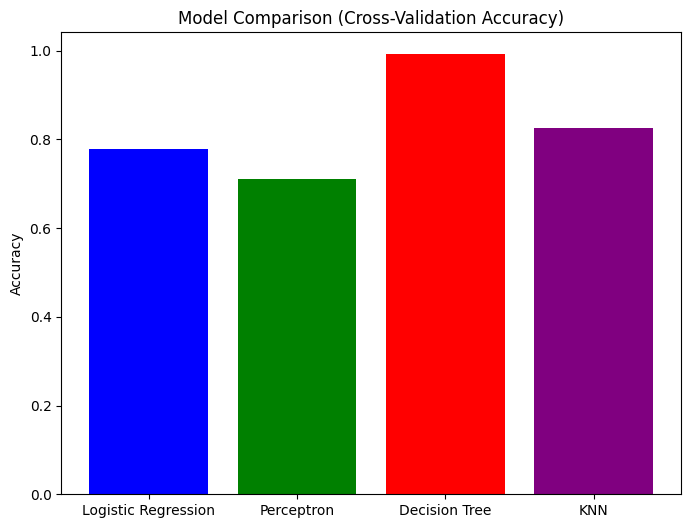

In [17]:
# Plots for comparison
# Plot the Cross-Validation accuracy scores for each model
plt.figure(figsize=(8, 6))
plt.bar(cv_results['Model'], cv_results['Cross-Validation Accuracy'], color=['blue', 'green', 'red', 'purple'])
plt.title('Model Comparison (Cross-Validation Accuracy)')
plt.ylabel('Accuracy')
plt.show()


In [18]:
#DRAW CONCLUSION
# Print the conclusions based on the comparison
print("Conclusions:")
print(f"1. Logistic Regression performed with an average CV accuracy of {log_cv_scores.mean():.2f}.")
print(f"2. Perceptron performed with an average CV accuracy of {perceptron_cv_scores.mean():.2f}.")
print(f"3. Decision Tree performed with an average CV accuracy of {tree_cv_scores.mean():.2f}.")
print(f"4. KNN performed with an average CV accuracy of {knn_cv_scores.mean():.2f}.")


Conclusions:
1. Logistic Regression performed with an average CV accuracy of 0.78.
2. Perceptron performed with an average CV accuracy of 0.71.
3. Decision Tree performed with an average CV accuracy of 0.99.
4. KNN performed with an average CV accuracy of 0.83.


In [26]:
# Prediction function for K-Nearest Neighbors model with feature names
import pandas as pd

def predict_diabetes_knn(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age):
    """
    Predicts diabetes outcome (0 or 1) using the K-Nearest Neighbors (KNN) model.

    Parameters:
        - Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age: Feature values.

    Returns:
        - Prediction result (0: No Diabetes, 1: Diabetes).
    """

    # Create a DataFrame with the input features and correct column names
    features = pd.DataFrame([[
        int(Pregnancies),
        float(Glucose),
        float(BloodPressure),
        float(SkinThickness),
        float(Insulin),
        float(BMI),
        float(DPF),
        int(Age)
    ]], columns=["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"])

    # Scale the input using the same scaler as in training
    features_scaled = scaler.transform(features)

    # Predict the outcome using the trained KNN model
    prediction = knn_model.predict(features_scaled)

    # Return prediction (0: No Diabetes, 1: Diabetes)
    return prediction[0]


In [28]:
# Example usage of the KNN prediction function
result = predict_diabetes_knn(2, 120, 70, 20, 85, 30.0, 0.5, 25)
print("Prediction:", "Diabetes" if result == 1 else "No Diabetes")



Prediction: No Diabetes


In [29]:
result = predict_diabetes_knn(5, 150, 80, 35, 120, 33.5, 0.7, 40)
print("Prediction:", "Diabetes" if result == 1 else "No Diabetes")


Prediction: No Diabetes


In [31]:
result = predict_diabetes_knn(6, 160, 85, 30, 110, 35.0, 0.8, 50)
print("Prediction:", "Diabetes" if result == 1 else "No Diabetes")


Prediction: Diabetes
